# One Max Problem

In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt

from deap import base, creator, tools, algorithms

In [2]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [3]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
# Cria um individuo contendo 100 valores aleatorios 0 ou 1
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 100)
# Cria um populacao de individuos do tipo "individual"
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [4]:
def eval_one_max(indv):
    return sum(indv),

toolbox.register("evaluate", eval_one_max)

In [5]:
INDPB = 0.05
POP_SIZE = 300
CXPB = 0.5
MUTPB = 0.2
NGEN = 100

In [9]:
toolbox.register("mutate", tools.mutFlipBit, indpb=INDPB)
toolbox.register("select", tools.selTournament, tournsize=3)

## Crossover

### One Point + FLip Bit

In [12]:
toolbox.register("mate", tools.cxOnePoint)

In [13]:
pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.amax)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std   	min	max
0  	300   	50.3867	4.9609	35 	66 
1  	186   	54.4167	4.29609	44 	67 
2  	191   	58.0633	3.95466	46 	68 
3  	182   	61.0033	3.7009 	50 	72 
4  	183   	64.1467	3.70834	51 	75 
5  	193   	66.7567	3.35521	58 	75 
6  	181   	69.1667	2.90498	62 	76 
7  	181   	71.3467	2.34659	63 	77 
8  	167   	72.6667	2.07739	66 	77 
9  	188   	73.5933	2.06106	67 	80 
10 	201   	74.6833	2.33161	63 	81 
11 	181   	76.0333	1.98634	69 	81 
12 	180   	77.19  	2.18645	69 	83 
13 	166   	78.39  	2.18126	71 	84 
14 	176   	79.4267	2.26082	71 	85 
15 	178   	80.4567	2.3284 	68 	86 
16 	159   	81.7733	2.26023	72 	88 
17 	197   	82.5633	2.48314	74 	88 
18 	176   	83.9033	1.97838	75 	90 
19 	178   	84.7933	2.1379 	75 	90 
20 	177   	85.4833	1.98403	79 	90 
21 	170   	86.2133	2.03826	76 	90 
22 	176   	86.94  	1.94672	76 	90 
23 	188   	87.59  	2.0038 	81 	91 
24 	167   	88.2733	1.89876	81 	92 
25 	188   	88.7233	2.22114	79 	92 
26 	183   	89.33  	2.08832	82 	93 
27 	181   	89.9367	2.5

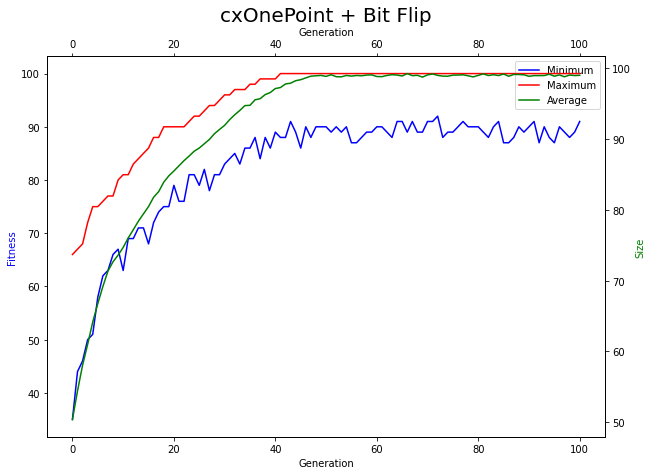

In [14]:
gen = log.select("gen")
fit_min = log.select("min")
fit_max = log.select("max")
fit_avg = log.select("avg")

fig, ax1 = plt.subplots(figsize=(10,7))
line1 = ax1.plot(gen, fit_min, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twiny()
line2 = ax2.plot(gen, fit_max, "r", label="Maximum")
ax2.set_xlabel("Generation")

ax3 = ax1.twinx()
line3 = ax3.plot(gen, fit_avg, "g", label="Average")
ax3.set_ylabel("Size", color="g")

lns = line1 + line2 + line3
labs = ["Minimum", "Maximum","Average"]
ax1.legend(lns, labs)

plt.title("cxOnePoint + Bit Flip", fontsize=20)

plt.show()

In [15]:
toolbox.unregister("mate")

### Two Point + Flip Bit

In [16]:
toolbox.register("mate", tools.cxTwoPoint)

In [17]:
pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.amax)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg  	std    	min	max
0  	300   	49.97	4.67002	35 	63 
1  	195   	53.8633	3.98556	45 	65 
2  	188   	57.3767	3.44308	47 	66 
3  	166   	60.0567	2.93146	53 	68 
4  	201   	62.1667	2.81405	55 	73 
5  	194   	64.2033	2.52362	58 	71 
6  	171   	66.05  	2.65848	57 	73 
7  	165   	68.0867	2.45883	60 	76 
8  	184   	69.9267	2.2184 	60 	78 
9  	188   	71.25  	2.40572	59 	78 
10 	192   	72.4467	2.46451	64 	80 
11 	187   	73.8033	2.59448	64 	82 
12 	170   	75.3433	2.71148	67 	84 
13 	173   	76.8933	2.6436 	66 	84 
14 	193   	78.45  	2.62186	68 	85 
15 	192   	80.0567	2.70311	71 	87 
16 	175   	81.65  	2.2198 	75 	87 
17 	183   	82.4933	2.57228	71 	89 
18 	207   	83.96  	2.49233	74 	90 
19 	195   	85.1967	2.37865	78 	90 
20 	189   	86.3567	2.54875	76 	91 
21 	191   	87.36  	2.46382	79 	92 
22 	160   	88.4033	2.43598	77 	93 
23 	175   	89.14  	2.3066 	80 	93 
24 	179   	89.9833	2.10786	82 	94 
25 	175   	90.6567	2.17994	80 	95 
26 	163   	91.57  	1.68477	84 	95 
27 	158   	91.9333	2.292

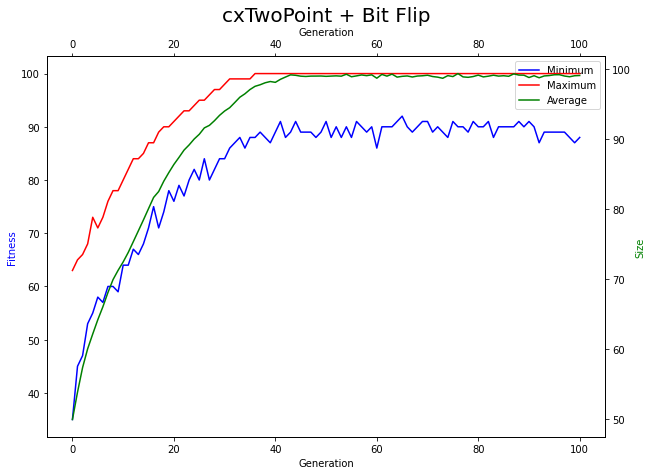

In [18]:
gen = log.select("gen")
fit_min = log.select("min")
fit_max = log.select("max")
fit_avg = log.select("avg")


fig, ax1 = plt.subplots(figsize=(10,7))
line1 = ax1.plot(gen, fit_min, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twiny()
line2 = ax2.plot(gen, fit_max, "r", label="Maximum")
ax2.set_xlabel("Generation")

ax3 = ax1.twinx()
line3 = ax3.plot(gen, fit_avg, "g", label="Average")
ax3.set_ylabel("Size", color="g")

lns = line1 + line2 + line3
labs = ["Minimum", "Maximum","Average"]
ax1.legend(lns, labs)

plt.title("cxTwoPoint + Bit Flip", fontsize=20)

plt.show()

In [19]:
toolbox.unregister("mate")

#### Observação

cxOnePoint e cxTwoPoint: apresentam resultados melhores e piores de forma aleatória a cada nova vez executados, acontecendo de um ser melhor que o outro sem um padrão definido.


### Uniform + Bit Flip

In [20]:
toolbox.register("mate", tools.cxUniform, indpb=0.5)

In [21]:
pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.amax)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg 	std    	min	max
0  	300   	50.4	5.07937	35 	64 
1  	175   	54.95	4.0654 	42 	68 
2  	179   	58.2933	3.71761	44 	71 
3  	184   	61.4633	3.52732	51 	75 
4  	181   	64.14  	3.57497	53 	75 
5  	163   	67.1167	3.41902	56 	77 
6  	204   	69.5067	3.59768	57 	79 
7  	170   	72.04  	3.48976	62 	81 
8  	178   	74.4533	2.88349	65 	81 
9  	187   	76.4567	3.07378	65 	86 
10 	188   	78.2333	2.89693	70 	86 
11 	171   	79.9433	2.87752	70 	88 
12 	159   	81.5767	2.95817	72 	89 
13 	186   	83.2767	3.01554	73 	91 
14 	176   	85.14  	2.63067	76 	93 
15 	171   	86.4667	2.82764	76 	94 
16 	182   	87.79  	2.70664	79 	94 
17 	180   	88.8733	2.81495	79 	96 
18 	187   	90.44  	2.846  	79 	98 
19 	189   	91.7367	2.78938	83 	99 
20 	162   	93.3467	2.89824	83 	99 
21 	189   	94.7867	2.53005	85 	99 
22 	171   	95.6767	2.71271	83 	100
23 	184   	96.6733	2.47655	85 	100
24 	173   	97.3567	2.35997	88 	100
25 	189   	97.8767	2.39891	88 	100
26 	194   	98.09  	2.42801	89 	100
27 	191   	98.5067	2.40485	8

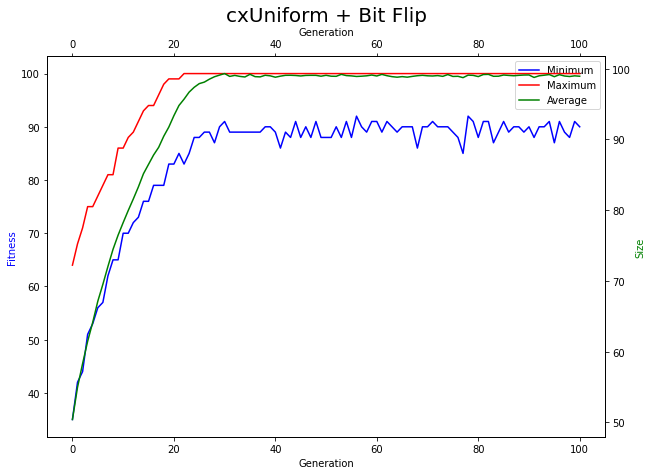

In [22]:
gen = log.select("gen")
fit_min = log.select("min")
fit_max = log.select("max")
fit_avg = log.select("avg")


fig, ax1 = plt.subplots(figsize=(10,7))
line1 = ax1.plot(gen, fit_min, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twiny()
line2 = ax2.plot(gen, fit_max, "r", label="Maximum")
ax2.set_xlabel("Generation")

ax3 = ax1.twinx()
line3 = ax3.plot(gen, fit_avg, "g", label="Average")
ax3.set_ylabel("Size", color="g")

lns = line1 + line2 + line3
labs = ["Minimum", "Maximum","Average"]
ax1.legend(lns, labs)

plt.title("cxUniform + Bit Flip", fontsize=20)

plt.show()

Crossover uniforme apresenta resultados melhores que os anteriores de forma constante.

In [ ]:
toolbox.unregister("mate")

## Mutação

In [20]:
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.unregister("mutate")

### BitFlip + cxUniform

In [21]:
toolbox.register("mutate", tools.mutFlipBit, indpb=INDPB)

In [22]:
pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.amax)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min	max
0  	300   	49.7367	5.46327	33 	63 
1  	173   	54.7267	4.32188	42 	67 
2  	193   	58.3533	3.8646 	48 	68 
3  	201   	61.21  	3.5664 	50 	72 
4  	166   	64.0767	3.31825	53 	75 
5  	184   	66.3867	3.36311	55 	76 
6  	184   	68.7833	3.36795	58 	78 
7  	204   	70.9967	3.19009	61 	80 
8  	178   	73.0933	3.07429	65 	82 
9  	188   	75.1633	3.51141	64 	87 
10 	189   	77.5533	3.66795	69 	89 
11 	188   	79.9767	3.42969	70 	89 
12 	159   	82.1833	2.95009	73 	89 
13 	179   	84.1933	2.96017	75 	91 
14 	181   	85.7633	2.80487	75 	92 
15 	172   	87.3967	2.65443	78 	94 
16 	163   	88.74  	2.61771	79 	95 
17 	166   	89.9933	2.63185	80 	97 
18 	175   	91.35  	2.63455	83 	97 
19 	175   	92.57  	2.63662	82 	98 
20 	181   	93.7933	2.84792	82 	99 
21 	192   	94.9833	2.69501	83 	99 
22 	186   	95.86  	2.49674	88 	99 
23 	164   	96.66  	2.30313	87 	100
24 	173   	97.2233	2.4028 	88 	100
25 	165   	98.0367	2.03027	89 	100
26 	174   	98.53  	2.08545	88 	100
27 	176   	98.7067	2

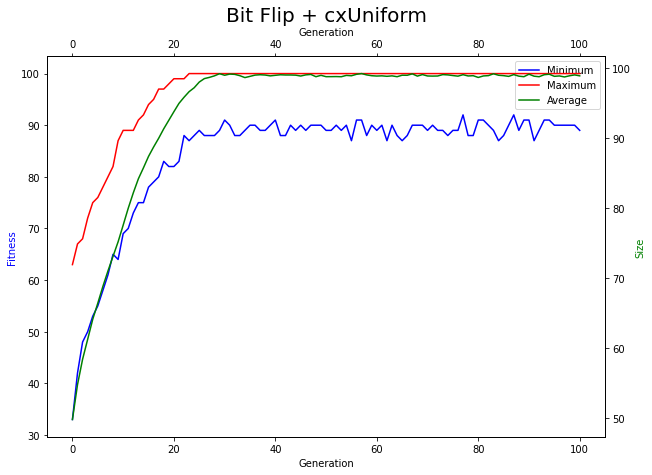

In [23]:
gen = log.select("gen")
fit_min = log.select("min")
fit_max = log.select("max")
fit_avg = log.select("avg")


fig, ax1 = plt.subplots(figsize=(10,7))
line1 = ax1.plot(gen, fit_min, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twiny()
line2 = ax2.plot(gen, fit_max, "r", label="Maximum")
ax2.set_xlabel("Generation")

ax3 = ax1.twinx()
line3 = ax3.plot(gen, fit_avg, "g", label="Average")
ax3.set_ylabel("Size", color="g")

lns = line1 + line2 + line3
labs = ["Minimum", "Maximum","Average"]
ax1.legend(lns, labs)

plt.title("Bit Flip + cxUniform", fontsize=20)

plt.show()

In [24]:
toolbox.unregister("mutate")

### Shuffle Indexes + cxUniform

In [25]:
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=INDPB)

In [26]:
pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.amax)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min	max
0  	300   	50.2667	5.35558	36 	65 
1  	168   	54.9633	4.18433	43 	68 
2  	185   	58.5933	3.8063 	49 	69 
3  	182   	61.99  	3.51234	52 	73 
4  	189   	64.95  	3.56663	54 	79 
5  	186   	67.9267	3.41974	59 	79 
6  	177   	70.67  	3.32582	62 	81 
7  	197   	73.7333	3.23557	65 	85 
8  	191   	76.6533	2.97543	70 	87 
9  	192   	79.12  	2.74693	72 	87 
10 	181   	81.4667	2.70226	73 	88 
11 	157   	83.8133	2.19966	79 	91 
12 	189   	85.6733	2.11816	80 	92 
13 	173   	87.38  	1.97204	81 	94 
14 	171   	89.0833	2.04036	82 	94 
15 	176   	90.7433	1.79373	85 	96 
16 	159   	92.2133	1.6974 	88 	97 
17 	165   	93.6867	1.56902	89 	98 
18 	171   	95.08  	1.39054	90 	99 
19 	182   	96.33  	1.28365	92 	100
20 	203   	97.3467	1.15751	93 	100
21 	192   	98.26  	0.941134	95 	100
22 	194   	99.0167	0.75037 	97 	100
23 	195   	99.6067	0.521494	98 	100
24 	185   	99.9567	0.203606	99 	100
25 	167   	100    	0       	100	100
26 	190   	100    	0       	100	100
27 	176   	100

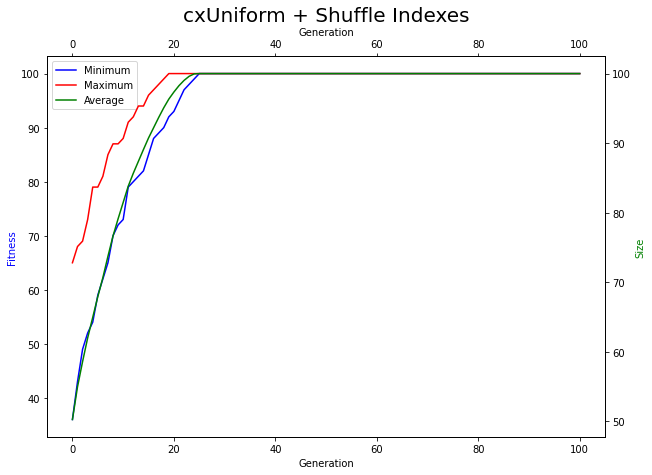

In [27]:
gen = log.select("gen")
fit_min = log.select("min")
fit_max = log.select("max")
fit_avg = log.select("avg")


fig, ax1 = plt.subplots(figsize=(10,7))
line1 = ax1.plot(gen, fit_min, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twiny()
line2 = ax2.plot(gen, fit_max, "r", label="Maximum")
ax2.set_xlabel("Generation")

ax3 = ax1.twinx()
line3 = ax3.plot(gen, fit_avg, "g", label="Average")
ax3.set_ylabel("Size", color="g")

lns = line1 + line2 + line3
labs = ["Minimum", "Maximum","Average"]
ax1.legend(lns, labs)

plt.title("cxUniform + Shuffle Indexes", fontsize=20)

plt.show()

In [30]:
toolbox.unregister("mutate")

## Seleção

In [56]:
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.5)
toolbox.unregister("select")

### Roulette

In [57]:
toolbox.register("select", tools.selRoulette)

In [58]:
pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.amax)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min	max
0  	300   	49.9767	4.95474	37 	64 
1  	174   	51.0067	4.97795	37 	63 
2  	189   	51.8367	4.72335	40 	65 
3  	170   	51.7033	5.13374	39 	65 
4  	192   	52.2133	5.05844	39 	65 
5  	158   	53.12  	5.06612	40 	66 
6  	176   	53.6467	4.53304	40 	65 
7  	187   	53.96  	4.68456	40 	67 
8  	183   	54.0467	4.88308	40 	66 
9  	188   	54.5833	4.5698 	42 	66 
10 	200   	54.8867	4.49598	43 	67 
11 	177   	55.37  	4.79511	40 	74 
12 	188   	55.61  	5.00379	41 	74 
13 	171   	56.1267	4.73117	45 	74 
14 	189   	56.2267	5.35929	44 	74 
15 	159   	56.3733	5.33235	45 	74 
16 	193   	57.0533	4.9877 	45 	71 
17 	179   	57.5267	5.03017	43 	70 
18 	197   	57.68  	5.05149	43 	70 
19 	169   	58.3233	5.20757	43 	70 
20 	176   	58.9267	4.92287	44 	75 
21 	183   	59.1   	4.89183	45 	72 
22 	185   	59.6433	4.81   	38 	73 
23 	173   	60.01  	4.5574 	47 	73 
24 	171   	60.2967	4.68494	47 	75 
25 	179   	60.8833	4.41396	47 	75 
26 	165   	61.1333	4.33769	48 	75 
27 	181   	61.3933	4

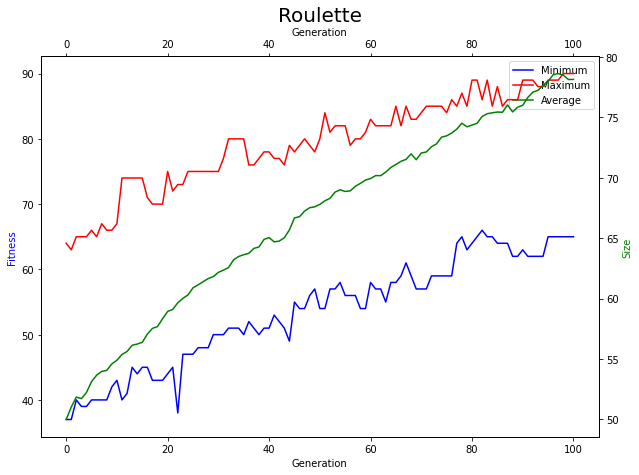

In [59]:
gen = log.select("gen")
fit_min = log.select("min")
fit_max = log.select("max")
fit_avg = log.select("avg")


fig, ax1 = plt.subplots(figsize=(10,7))
line1 = ax1.plot(gen, fit_min, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twiny()
line2 = ax2.plot(gen, fit_max, "r", label="Maximum")
ax2.set_xlabel("Generation")

ax3 = ax1.twinx()
line3 = ax3.plot(gen, fit_avg, "g", label="Average")
ax3.set_ylabel("Size", color="g")

lns = line1 + line2 + line3
labs = ["Minimum", "Maximum","Average"]
ax1.legend(lns, labs)

plt.title("Roulette", fontsize=20)

plt.show()

In [60]:
toolbox.unregister("select")

### Torneio

#### Dois

In [61]:
toolbox.register("select", tools.selTournament, tournsize=2)

In [62]:
pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.amax)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min	max
0  	300   	49.7433	4.97234	34 	65 
1  	182   	52.6133	4.36239	39 	65 
2  	186   	54.7967	4.03344	43 	68 
3  	181   	57     	4.20397	45 	69 
4  	167   	59.3467	4.05953	50 	71 
5  	175   	61.59  	3.83778	51 	74 
6  	165   	64.2267	3.76058	53 	75 
7  	180   	65.9967	3.86911	56 	75 
8  	176   	68.05  	3.41089	58 	76 
9  	169   	69.87  	3.2863 	58 	80 
10 	184   	71.8467	3.37686	61 	82 
11 	188   	73.4733	3.13836	64 	83 
12 	185   	75.16  	3.02452	66 	84 
13 	174   	76.93  	2.88994	68 	86 
14 	197   	78.8267	2.72335	71 	88 
15 	186   	80.4433	2.76408	71 	88 
16 	196   	81.97  	2.71338	75 	89 
17 	181   	83.7033	2.69109	74 	93 
18 	184   	85.27  	2.86189	76 	93 
19 	181   	86.7767	2.55737	80 	94 
20 	186   	88.2567	2.66786	81 	95 
21 	177   	89.8567	2.60694	82 	96 
22 	176   	91.2633	2.39318	83 	97 
23 	170   	92.6267	1.99849	87 	98 
24 	191   	93.85  	2.00354	87 	99 
25 	173   	94.9233	1.53323	90 	98 
26 	177   	95.8   	1.58745	91 	100
27 	182   	96.5767	1

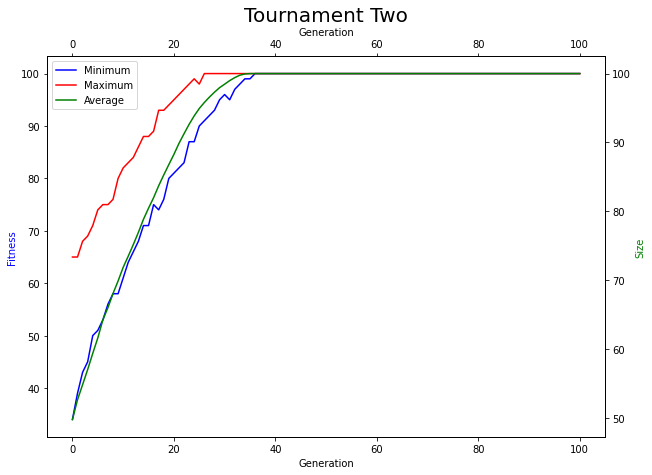

In [63]:
gen = log.select("gen")
fit_min = log.select("min")
fit_max = log.select("max")
fit_avg = log.select("avg")


fig, ax1 = plt.subplots(figsize=(10,7))
line1 = ax1.plot(gen, fit_min, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twiny()
line2 = ax2.plot(gen, fit_max, "r", label="Maximum")
ax2.set_xlabel("Generation")

ax3 = ax1.twinx()
line3 = ax3.plot(gen, fit_avg, "g", label="Average")
ax3.set_ylabel("Size", color="g")

lns = line1 + line2 + line3
labs = ["Minimum", "Maximum","Average"]
ax1.legend(lns, labs)

plt.title("Tournament Two", fontsize=20)

plt.show()

In [64]:
toolbox.unregister("select")

#### Três

In [65]:
toolbox.register("select", tools.selTournament, tournsize=3)

In [66]:
pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.amax)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg  	std    	min	max
0  	300   	50.45	5.05577	39 	66 
1  	172   	54.5233	3.93566	45 	67 
2  	167   	58.1933	3.86729	47 	70 
3  	179   	61.5433	3.41879	51 	71 
4  	174   	64.5233	3.20668	55 	73 
5  	164   	67.15  	3.40306	54 	79 
6  	177   	69.68  	2.94804	59 	79 
7  	172   	72.2   	2.99778	64 	80 
8  	204   	74.7133	2.97733	65 	83 
9  	201   	77.2567	2.86661	68 	84 
10 	178   	79.6433	2.38805	73 	86 
11 	173   	81.7433	2.43532	74 	88 
12 	185   	83.7533	2.36766	73 	91 
13 	166   	85.75  	2.21529	79 	93 
14 	178   	87.6033	2.2389 	80 	93 
15 	170   	89.42  	2.04049	84 	96 
16 	194   	91.19  	2.04464	85 	98 
17 	170   	92.8467	1.74064	87 	98 
18 	185   	94.35  	1.64545	90 	99 
19 	189   	95.69  	1.51676	92 	99 
20 	175   	96.98  	1.24081	93 	100
21 	193   	98.0333	1.06406	95 	100
22 	200   	98.8633	0.819343	95 	100
23 	178   	99.52  	0.59127 	98 	100
24 	181   	99.9333	0.249444	99 	100
25 	182   	100    	0       	100	100
26 	173   	100    	0       	100	100
27 	195   	100    	

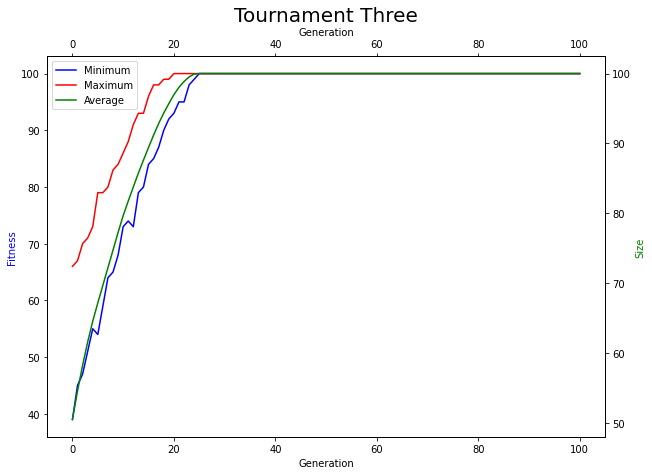

In [67]:
gen = log.select("gen")
fit_min = log.select("min")
fit_max = log.select("max")
fit_avg = log.select("avg")


fig, ax1 = plt.subplots(figsize=(10,7))
line1 = ax1.plot(gen, fit_min, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twiny()
line2 = ax2.plot(gen, fit_max, "r", label="Maximum")
ax2.set_xlabel("Generation")

ax3 = ax1.twinx()
line3 = ax3.plot(gen, fit_avg, "g", label="Average")
ax3.set_ylabel("Size", color="g")

lns = line1 + line2 + line3
labs = ["Minimum", "Maximum","Average"]
ax1.legend(lns, labs)

plt.title("Tournament Three", fontsize=20)

plt.show()

In [68]:
toolbox.unregister("select")

#### Cinco

In [69]:
toolbox.register("select", tools.selTournament, tournsize=5)

In [70]:
pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.amax)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min	max
0  	300   	50.1067	5.06839	33 	64 
1  	182   	55.58  	3.76788	46 	66 
2  	184   	59.6933	3.63216	48 	69 
3  	180   	63.9767	3.19627	54 	73 
4  	155   	67.3533	2.91236	59 	79 
5  	171   	70.8633	2.97736	63 	81 
6  	182   	74.66  	3.38886	65 	83 
7  	196   	78.8567	2.76576	70 	88 
8  	175   	81.9667	2.21936	75 	90 
9  	184   	84.5367	2.51436	75 	93 
10 	179   	87.66  	2.5699 	81 	96 
11 	159   	90.6567	2.18452	84 	97 
12 	188   	93.16  	1.91861	88 	98 
13 	183   	95.2533	1.38894	91 	99 
14 	180   	96.85  	1.02673	94 	99 
15 	161   	98.0433	0.902657	95 	100
16 	182   	99.02  	0.697328	97 	100
17 	163   	99.72  	0.477773	98 	100
18 	205   	99.9933	0.081377	99 	100
19 	187   	100    	0       	100	100
20 	186   	100    	0       	100	100
21 	198   	100    	0       	100	100
22 	197   	100    	0       	100	100
23 	188   	100    	0       	100	100
24 	191   	100    	0       	100	100
25 	178   	100    	0       	100	100
26 	188   	100    	0       	100	100
27 	190 

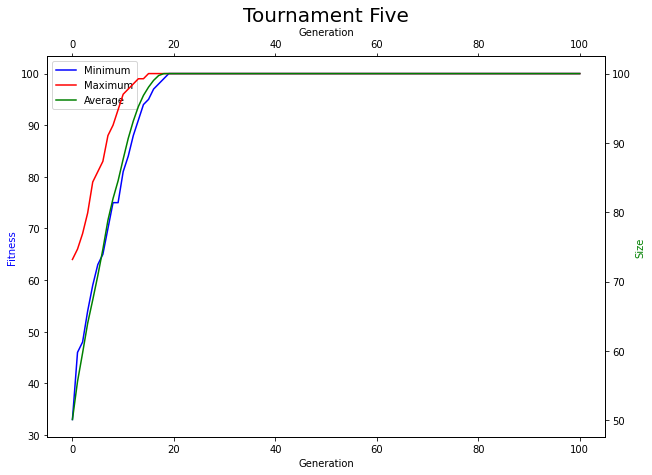

In [71]:
gen = log.select("gen")
fit_min = log.select("min")
fit_max = log.select("max")
fit_avg = log.select("avg")


fig, ax1 = plt.subplots(figsize=(10,7))
line1 = ax1.plot(gen, fit_min, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twiny()
line2 = ax2.plot(gen, fit_max, "r", label="Maximum")
ax2.set_xlabel("Generation")

ax3 = ax1.twinx()
line3 = ax3.plot(gen, fit_avg, "g", label="Average")
ax3.set_ylabel("Size", color="g")

lns = line1 + line2 + line3
labs = ["Minimum", "Maximum","Average"]
ax1.legend(lns, labs)

plt.title("Tournament Five", fontsize=20)

plt.show()